# Evaluación 2

---



**Autor:**

**Correo Electrónico:**

**Fecha de Creación:** Junio 2025

**Versión:** 1.0  



---

## Descripción

Este notebook corresponde al desarrollo de la entrega 2 de la asignatura electiva de Machine Learning de DuocUC - Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy (2.0.2)
- matplotlib (3.10.0)
- pandas (2.2.2)
- seaborn (0.13.2)
- sklearn (1.6.1)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

# Fase 0 - Cargar de los datos

## 1. Importación e instalación de librerías

In [80]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [81]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, RobustScaler, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit, StratifiedKFold, cross_validate
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, make_scorer
from ydata_profiling import ProfileReport
from ydata_profiling.config import Settings
from numpy import expm1

## 2. Carga de datos

In [82]:
!wget https://www.dropbox.com/s/h160fwrthtb4gte/Base_Clientes_Monopoly.csv

--2025-06-04 11:02:59--  https://www.dropbox.com/s/h160fwrthtb4gte/Base_Clientes_Monopoly.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/mz5u7ddatqayntt2crleq/Base_Clientes_Monopoly.csv?rlkey=nyn3hzxxby855id3gxxlbdev6 [following]
--2025-06-04 11:02:59--  https://www.dropbox.com/scl/fi/mz5u7ddatqayntt2crleq/Base_Clientes_Monopoly.csv?rlkey=nyn3hzxxby855id3gxxlbdev6
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8b6ffc73b87a1263b3abbf589a.dl.dropboxusercontent.com/cd/0/inline/Cq8h6rBM5pALdjHZPwYmwhI_JkVNP9RbUlb2jVc09LIwHdQacgcfyn7txOZvPpU5yYda_SLctOcYDprjOSnSj7322Sg58a0QOWHSUg-dcz9f0LFYRp7Pyv0qtXIq1EVsGvZQQW-BB66wjLhJVruTps6M/file# [following]
--2025-06-04 11:02:59--  https://uc8b6ffc73b87a1263b3abbf58

In [83]:
data = pd.read_csv("Base_Clientes_Monopoly.csv", sep=";", low_memory = False)
data

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
0,1,160,M,13.0,43,NaN,130,1,1,0,...,0,33000,0,1099866,0,1099866,15080,0,R,0
1,2,160,H,13.0,46,143640,69,1,0,0,...,0,300000,0,214592,0,214592,83596,0,R,0
2,3,170,H,13.0,45,929106,24,1,1,0,...,0,216676,0,0,0,7400,0,0,T,0
3,4,151,H,13.0,46,172447,134,0,1,0,...,0,60000,0,272762,0,272762,10591,0,R,0
4,5,170,H,13.0,46,805250,116,0,1,1,...,0,272925,0,249562,0,75339,377782,0,R,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,51120,160,H,13.0,51,364978,57,1,1,1,...,0,300000,0,478320,0,478320,12668,0,R,0
51120,51121,170,H,13.0,51,625376,39,1,0,0,...,0,166098,0,166098,0,0,572363,0,R,0
51121,51122,160,H,13.0,47,806220,153,1,1,0,...,0,18891,0,9652,0,9652,16241,0,R,0
51122,51123,160,M,13.0,47,NaN,11,1,0,0,...,0,26528,0,24638,0,24638,84982,0,R,0


# Fase 3 - Preparación de los datos

## 3.1 Limpieza inicial

In [84]:
#Transformación columnas con datos string a númerico
columnas_cambiar = ['Fac_T03', 'Fac_T06', 'Fac_T10', 'Fac_T11', 'Fac_T12']

for col in columnas_cambiar:
    data[col] = pd.to_numeric(data[col], errors='coerce')

print(data[columnas_cambiar].dtypes)


Fac_T03    float64
Fac_T06    float64
Fac_T10    float64
Fac_T11    float64
Fac_T12    float64
dtype: object


## 3.2 Tratamiento de nulos

In [85]:
FAC_COLS   = [f'Fac_T{str(i).zfill(2)}'   for i in range(1, 13)]
PAGOS_COLS = [f'PagoNac_T{str(i).zfill(2)}' for i in range(1, 13)]
NUM_COLS   = FAC_COLS + PAGOS_COLS

# Copia inmutable del set original
df_raw = data.copy()

# ----------------------- Imputación --------------------------
imputer = SimpleImputer(strategy='median')

df_imputed = df_raw.copy()
df_imputed[NUM_COLS] = imputer.fit_transform(df_imputed[NUM_COLS])

# Reemplazar negativos por 0 (antes de log1p)
df_imputed[NUM_COLS] = df_imputed[NUM_COLS].clip(lower=0)

# Guardar etapa de imputación
df_imputed.to_parquet("clientes_imputados.parquet", index=False)

## 3.3 Transformación de variables

In [86]:
# ----------------------- Transformación + Escalado ----------
log1p  = FunctionTransformer(np.log1p, validate=False)
scaler = RobustScaler()

df_transformed = df_imputed.copy()

# 1. Aplicar log1p
df_transformed[NUM_COLS] = log1p.transform(df_transformed[NUM_COLS])

# 2. Aplicar escalado robusto y asegurarse de mantener columnas originales
scaled_array = scaler.fit_transform(df_transformed[NUM_COLS])
df_transformed[NUM_COLS] = pd.DataFrame(scaled_array, columns=NUM_COLS, index=df_transformed.index)

# 3. Guardar etapa final
df_transformed.to_parquet("clientes_imputados_transformados.parquet", index=False)

# 4. Comprobación
df_scaled = pd.read_parquet("clientes_imputados_transformados.parquet")
resumen = df_scaled[NUM_COLS].describe()   # <-- solo esas 24
print(resumen.T)


               count      mean       std       min       25%           50%  \
Fac_T01      51124.0 -0.258746  0.463269 -0.893595 -0.893595  0.000000e+00   
Fac_T02      51124.0 -0.239026  0.449668 -0.902140 -0.902140  0.000000e+00   
Fac_T03      51124.0 -0.235838  0.447449 -0.906634 -0.906634  0.000000e+00   
Fac_T04      51124.0 -0.239191  0.448877 -0.905049 -0.905049  0.000000e+00   
Fac_T05      51124.0 -0.250993  0.458656 -0.895724 -0.895724  0.000000e+00   
Fac_T06      51124.0 -0.242946  0.454066 -0.900811 -0.900811  0.000000e+00   
Fac_T07      51124.0 -0.230440  0.441525 -0.911216 -0.911216  0.000000e+00   
Fac_T08      51124.0 -0.243818  0.454285 -0.902270 -0.902270  0.000000e+00   
Fac_T09      51124.0 -0.234549  0.448381 -0.907373 -0.907373  0.000000e+00   
Fac_T10      51124.0 -0.239059  0.455329 -0.903642 -0.903642  0.000000e+00   
Fac_T11      51124.0 -0.226583  0.445641 -0.913179 -0.913179  0.000000e+00   
Fac_T12      51124.0 -0.228937  0.449296 -0.908617 -0.908617  0.

# Fase 4 - Modelamiento

## Modelos de regresión

### Definición de Variable objetivo

In [87]:
# Datos base: df_imputed (solo log1p, SIN RobustScaler)
log1p_fac = FunctionTransformer(np.log1p, validate=False).transform(df_imputed[FAC_COLS])
df_log = pd.DataFrame(log1p_fac, columns=FAC_COLS, index=df_imputed.index)

df_log['dFac_T12'] = df_log['Fac_T12'] - df_log['Fac_T11']

y = df_log['dFac_T12']

En esta sección, trabajamos con las columnas de facturación mensual (`Fac_T01` a `Fac_T12`) para construir un modelo supervisado de regresión que prediga el cambio en la facturación del último mes, en base a patrones anteriores.

Se utiliza una transformación `log1p` (`log(1 + x)`) sobre las columnas de facturación para reducir la asimetría de los datos y atenuar el impacto de valores extremadamente altos (outliers).

Se define como **variable dependiente (y)** el cambio en facturación entre el mes 11 y el mes 12 (`dFac_T12`). Es decir, queremos predecir cuánto variará la facturación en el último mes a partir de los meses anteriores.

Este enfoque permite abordar el problema como una regresión polinomial, ya que se intentará ajustar una función que relacione las facturaciones históricas y sus variaciones con el cambio futuro de facturación.

### Distribución de variable objetivo

In [88]:
df_imputed_2 = pd.read_parquet("clientes_imputados.parquet")
fac_cols = [col for col in df_imputed_2.columns if col.startswith('Fac_T')]
perfil_fac = ProfileReport(df_imputed_2[fac_cols], title="Comportamiento Mensual", minimal=True)

perfil_fac.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 18.24it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Selección de variables independientes

In [89]:
for i in range(2, 12):
    df_log[f'dFac_T{str(i).zfill(2)}'] = df_log[f'Fac_T{str(i).zfill(2)}'] - df_log[f'Fac_T{str(i-1).zfill(2)}']

X = df_log[[f'Fac_T{str(i).zfill(2)}' for i in range(1, 12)] +
           [f'dFac_T{str(i).zfill(2)}' for i in range(2, 12)]]

Para predecir el cambio de facturación en el último mes (`dFac_T12`), se utilizan como variables explicativas:

- Las facturaciones de los **primeros 11 meses**: `Fac_T01` a `Fac_T11`
- Las **variaciones mensuales** entre los primeros 11 meses: `dFac_T02` a `dFac_T11`

Estas variables permiten capturar tanto el nivel de facturación acumulado como la dinámica del cambio mes a mes en la facturación.


Las variaciones mensuales se expresan de la siguiente forma:

$$
dFac_{T02} = Fac_{T02} - Fac_{T01},\quad
dFac_{T03} = Fac_{T03} - Fac_{T02},\quad \ldots,\quad
dFac_{T11} = Fac_{T11} - Fac_{T10}
$$

### Separación datos de entrenamiento y test

### Algoritmo 1 - `Regresion Polinomial`

#### Creación del modelo

In [90]:
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('reg', Ridge(alpha=1.0))
])

El modelo se estructura mediante un Pipeline, que organiza todas las etapas del preprocesamiento y el ajuste:

**StandardScaler**: Estandariza las variables para que tengan media 0 y desviación estándar 1. Esto es fundamental para la regresión polinomial, ya que los términos elevados al cuadrado pueden tener escalas muy diferentes.

**PolynomialFeatures**: Genera términos polinomiales de segundo grado (cuadrados y combinaciones entre variables). Por ejemplo, si una entrada es x₁ y x₂, se crearán nuevas variables como x₁², x₂² y x₁·x₂.

**Ridge**: Se utiliza regresión Ridge (una forma de regresión lineal con regularización L2) para evitar el sobreajuste, que puede surgir fácilmente al trabajar con muchos términos polinomiales.

#### Entrenamiento y evaluación del modelo

In [91]:
tscv = TimeSeriesSplit(n_splits=4)
mae_scores = -cross_val_score(pipe, X, y, cv=tscv,
                              scoring='neg_mean_absolute_error')

Se utiliza **TimeSeriesSplit** con 4 divisiones para evaluar el modelo preservando el orden temporal. Esto es preferible a un **train_test_split aleatorio**, ya que asegura que los datos de entrenamiento siempre ocurren antes que los de validación (imitando un escenario real de predicción temporal).

`sklearn` hace, por cada uno de los 4 folds definidos en **TimeSeriesSplit**:

Divide **X, y** en un sub‐conjunto de entrenamiento (X_train_fold, y_train_fold) y su correspondiente test (X_test_fold, y_test_fold).

Ejecuta internamente pipe.fit(X_train_fold, y_train_fold) para ajustar el pipeline entero (StandardScaler → PolynomialFeatures → Ridge) sobre ese fold de entrenamiento.

Después utiliza pipe.predict(X_test_fold) para obtener las predicciones en el fold de validación.

#### Cálculo e interpretación de métricas

##### R2

In [92]:
r2_scores = cross_val_score(pipe, X, y, cv=tscv, scoring='r2')   # scoring='r2'
print("R² por fold :", r2_scores)
print("R² promedio :", r2_scores.mean())

R² por fold : [0.32143402 0.33192641 0.35083502 0.32693584]
R² promedio : 0.3327828221496515


##### MAE

In [93]:
print("MAE promedio (TS CV):", mae_scores.mean())

MAE promedio (TS CV): 3.476462342236134


Este MAE representa en promedio cuánto se equivoca el modelo al predecir la variación de facturación del último mes.

### Algoritmo 2 - `DecisionTreeRegressor`

#### Creación del modelo

In [94]:
[ ]
# 1) Importar librerías necesarias para GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, KFold

# 2) Definir la rejilla de parámetros a explorar
param_grid = {
    'max_depth':        [None, 5, 10, 15, 20],
    'min_samples_split':[2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features':     [None, 'sqrt', 'log2']
}

# 3) Instanciar el DecisionTreeRegressor “base” (sin fijar hiperparámetros)
dt_base = DecisionTreeRegressor(random_state=42)

# 4) Configurar KFold de 5 splits para validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 5) Crear GridSearchCV para optimizar en función de R²
grid_search = GridSearchCV(
    estimator=dt_base,
    param_grid=param_grid,
    scoring='r2',          # Optimizar directamente el coeficiente de determinación
    cv=kf,                 # Usar KFold en 5 pliegues
    n_jobs=-1,             # Paralelizar en todos los núcleos disponibles
    verbose=1,             # Mostrar progreso
    return_train_score=True
)

# 6) Definir X e y (ya existentes en tu notebook)
#    X está compuesto por las columnas Fac_T01…Fac_T11 y dFac_T02…dFac_T11
#    y = df_log['dFac_T12']
X = df_log[[f'Fac_T{str(i).zfill(2)}' for i in range(1, 12)]
           + [f'dFac_T{str(i).zfill(2)}' for i in range(2, 12)]]
y = df_log['dFac_T12']


#### Entrenamiento del modelo

In [95]:
[ ]
# 1) Dividir X e y en entrenamiento (70 %) y prueba (30 %)
from sklearn.model_selection import train_test_split

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(
    X,
    y,
    test_size=0.30,
    random_state=42,
    shuffle=True
)

# 2) Ejecutar GridSearchCV sobre el conjunto de entrenamiento
grid_search.fit(X_train_dt, y_train_dt)

# 3) Extraer los mejores parámetros hallados
best_params = grid_search.best_params_
print("Mejores parámetros encontrados:", best_params)

# 4) Instanciar un DecisionTreeRegressor con esos parámetros óptimos
regressor_dt = DecisionTreeRegressor(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42
)

# 5) Entrenar el árbol óptimo con todo X_train_dt, y_train_dt
regressor_dt.fit(X_train_dt, y_train_dt)


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Mejores parámetros encontrados: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 2}


DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, random_state=42)

Usamos train_test_split tal y como en el Algoritmo 1, pero ahora sobre X e y definidos para el DecisionTree. Esto genera:

X_train_dt y y_train_dt (70 % de las filas)

X_test_dt y y_test_dt (30 % de las filas restantes)
Mantener random_state=42 asegura que la partición sea siempre la misma.

Con regressor_dt.fit(X_train_dt, y_train_dt) el árbol aprende las particiones basadas en las columnas Fac_T01…Fac_T11 y dFac_T02…dFac_T11 para aproximar dFac_T12.



#### Evaluación del modelo

#### Cálculo e interpretación de métricas

##### R2

In [96]:
[ ]
# 1) Realizar predicciones sobre el conjunto de prueba
y_pred_dt = regressor_dt.predict(X_test_dt)

# 2) Calcular el coeficiente de determinación R²
from sklearn.metrics import r2_score

r2_dt = r2_score(y_test_dt, y_pred_dt)
print(f"R² (DecisionTree optimizado, prueba): {r2_dt:.4f}")



R² (DecisionTree optimizado, prueba): 0.3159


Con regressor_dt.predict(X_test_dt) obtenemos las predicciones (y_pred_dt) para el 30 % de los datos que no vio el árbol en entrenamiento.

r2_score(y_test_dt, y_pred_dt) devuelve el coeficiente de determinación R², que mide la proporción de varianza en y_test_dt (los valores reales de dFac_T12) explicada por el modelo.

Un R² cercano a 1 indica que el árbol predice casi perfectamente la variabilidad de dFac_T12.

Un valor cercano a 0 (o negativo) indicaría escasa capacidad del árbol para explicar las variaciones reales.

##### MAE

In [97]:
[ ]
# 1) Calcular el Error Absoluto Medio (MAE) sobre el conjunto de prueba
from sklearn.metrics import mean_absolute_error

mae_dt = mean_absolute_error(y_test_dt, y_pred_dt)
print(f"MAE (DecisionTree optimizado, prueba): {mae_dt:.4f}")


MAE (DecisionTree optimizado, prueba): 3.4317


mean_absolute_error(y_test_dt, y_pred_dt) mide la diferencia absoluta promedio entre las predicciones y los valores reales de dFac_T12.

Un MAE bajo implica que, en promedio, el árbol “se equivoca poco” en las mismas unidades de dFac_T12 (que en este caso son las diferencias de logaritmo natural de facturación mensual).

Por ejemplo, si MAE = 0.05, significa que en promedio la predicción de Δlog(Fac_T12) se aleja en 0.05 unidades de logaritmo de la variación verdadera.

### Comparación de los modelos

### 📝 Interpretación

* **Desempeño global**  
  - Ambos modelos rinden **muy parecido** en esta escala transformada:  
    - R² ≈ 0.33  ⇒ explican ~33 % de la variabilidad del cambio de facturación.  
    - MAE ≈ 3.4 – 3.5  ⇒ error medio de ~3.5 unidades en la escala log-estandarizada.  
* **Robustez de la evaluación**  
  - El polinomial se midió con **4 folds temporales**, lo que suaviza la varianza entre muestras.  
  - El árbol se evaluó en **un solo bloque de test**; su métrica puede variar más si cambia la partición.  
* **Interpretabilidad vs. estabilidad**  
  - El **árbol** ofrece reglas claras (“si Fac_T05 > … entonces…”).  
  - El **polinomial** reparte peso entre muchas interacciones, menos intuitivo pero más suave (menor riesgo de overfitting).  

## Modelo de clasificación

### Definición de variable objetivo

Queremos construir un modelo que clasifique a los clientes en dos grupos:

1: si su facturación en el mes T12 aumentó respecto a T11

0: si no aumentó (es decir, se mantuvo igual o disminuyó)

Esto permite prever comportamientos positivos de consumo y podría servir para:

Focalizar promociones o créditos a quienes se espera que aumenten su consumo.

Detectar segmentos con señales de estancamiento o retroceso.



In [98]:
df_imputed["y_class"] = (df_imputed["Fac_T12"] > df_imputed["Fac_T11"]).astype(int)
y = df_imputed["y_class"]

### Distribución de variable objetivo

In [99]:
print("Distribución target:\n", y.value_counts(normalize=True).mul(100).round(2), "%")


Distribución target:
 y_class
0    66.86
1    33.14
Name: proportion, dtype: float64 %


### Selección de variables independientes

In [100]:
feat_fac   = [f"Fac_T{str(i).zfill(2)}"   for i in range(1, 12)]
feat_pago  = [f"PagoNac_T{str(i).zfill(2)}" for i in range(1, 12)]
X = df_imputed[feat_fac + feat_pago]

Son los valores históricos de facturación `(Fac_T01 a Fac_T11)` y pagos `(PagoNac_T01 a PagoNac_T11)`

### Separación datos entrenamiento y test

In [101]:
# 70 % train – 30 % test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)


### Algoritmo 1 - DecisionTreeClassifier

#### Creación del modelo

In [102]:
clf = DecisionTreeClassifier(
    max_depth=5,
    min_samples_leaf=20,
    class_weight="balanced",
    random_state=42
)

#### Entrenamiento del modelo

In [103]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_samples_leaf=20, random_state=42)

#### Evaluación del modelo

#### Cálculo e interpretación de métricas

In [104]:
# Predicciones
y_pred       = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]


##### Matriz de confusión

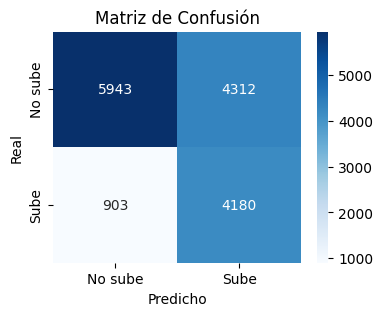

In [105]:
# Reporte y matriz de confusión
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

import seaborn as sns, matplotlib.pyplot as plt
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No sube","Sube"],
            yticklabels=["No sube","Sube"])
plt.title("Matriz de Confusión")
plt.ylabel("Real"); plt.xlabel("Predicho")
plt.show()

* **TP (4 180)** – crecen y se detectan  
* **FN ( 903)** – crecen pero se pierden  
* **FP (4 312)** – no crecen, pero se les oferta (posible pérdida de recursos)  
* **TN (5 493)** – no crecen y se acierta  

##### Accuracy

In [106]:
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec  = recall_score(y_test, y_pred)               # sensibilidad
spec = tn / (tn + fp) if (tn+fp) else 0           # especificidad
f1   = f1_score(y_test, y_pred)

met_df = pd.DataFrame({
    "Métrica":      ["Accuracy", "Precision", "Recall (Sens)", "Specificity", "F1‐score"],
    "Valor":        [acc, prec, rec, spec, f1]
})
display(met_df.style.format({"Valor": "{:.3f}"}))

,Métrica,Valor
0,Accuracy,0.660
1,Precision,0.492
2,Recall (Sens),0.822
3,Specificity,0.580
4,F1‐score,0.616


| Métrica | Valor | Lectura |
|---------|-------|---------------------------------------|
| **Accuracy** | **0.660** | Con ~34 % de “Sube” y ~66 % de “No sube”, la accuracy tiende a inflarse: basta con predecir siempre “No sube” para aciertos del 66 %. |
| **Precision** | **0.492** | De cada 100 clientes marcados como “Sube”, solo 49 lo harán. La cola larga (alta curtosis) produce muchos picos aislados que el árbol confunde con crecimientos. |
| **Recall / Sensibilidad** | **0.822** | El modelo detecta el 82 % de los casos “Sube”, lo cual es clave cuando los *positivos* son minoría. |
| **Specificity** | **0.580** | Solo 58 % de los “No sube” fueron identificados correctamente; la asimetría positiva genera falsos positivos en los valores altos. |
| **F1-score** | **0.616** | Aceptable considerando el desbalance y la dispersión extrema de montos. |

> **Contexto de distribución:**  
> La facturación mensual presenta **asimetría positiva alta** y **curtosis elevada**; unos pocos clientes concentran picos de gasto.  
> Esto provoca que el árbol, si no se regula, sobre-reaccione a esos valores extremos → muchos **falsos positivos** (precision ∼ 0.49) incluso manteniendo una buena cobertura (recall ∼ 0.82).


#### Aplicación de `CrossValidation`

In [107]:
scoring = {
    'accuracy' : make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=0),
    'recall'   : make_scorer(recall_score),
    'f1'       : make_scorer(f1_score)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_res = cross_validate(clf, X, y, cv=cv, scoring=scoring,
                        return_train_score=False)

fold_metrics = pd.DataFrame({
    'Fold': np.arange(1, 6),
    'Accuracy':  cv_res['test_accuracy'],
    'Precision': cv_res['test_precision'],
    'Recall':    cv_res['test_recall'],
    'F1':        cv_res['test_f1']
})
display(fold_metrics.style.format('{:.3f}'))

prom = fold_metrics.mean(axis=0, numeric_only=True)
std  = fold_metrics.std(axis=0, numeric_only=True)

print("\nPromedio ± Desv.")
for m in ['Accuracy','Precision','Recall','F1']:
    print(f"{m:10s}: {prom[m]:.3f} ± {std[m]:.3f}")

,Fold,Accuracy,Precision,Recall,F1
0,1.000,0.658,0.490,0.799,0.607
1,2.000,0.649,0.482,0.811,0.605
2,3.000,0.641,0.476,0.829,0.605
3,4.000,0.652,0.484,0.793,0.601
4,5.000,0.658,0.490,0.814,0.612



Promedio ± Desv.
Accuracy  : 0.651 ± 0.007
Precision : 0.485 ± 0.006
Recall    : 0.809 ± 0.014
F1        : 0.606 ± 0.004


#### Análisis de métricas usando `CrossValidation`

* **Estabilidad** – Las desviaciones son pequeñas (≤ 0.014), lo que indica que el árbol se comporta de forma consistente en los diferentes folds estratificados.
* **Recall alto (~ 0.81)** – El modelo capta ~ 81 % de los clientes que realmente aumentarán su facturación.
* **Precision moderada (~ 0.49)** – Casi la mitad de las predicciones positivas resultan ser falsos positivos.
* **Accuracy (~ 0.65)** – Supera la regla trivial de predecir siempre la clase mayoritaria (≈ 0.66 “no sube”), pero la verdadera ganancia se aprecia en el recall.
* **F1-score (~ 0.61)** – Balance aceptable entre captar crecimientos y limitar falsos positivos, aunque hay margen para mejorar la precisión.

### Algoritmo 2 - SVM

#### Creación del modelo

In [108]:
from sklearn.svm import SVC

# Crear el modelo SVM con balance de clases
modelo_svm = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)


#### Entrenamiento del modelo

In [109]:
# Escriba su código acá
modelo_svm.fit(X_train, y_train)

SVC(class_weight='balanced', probability=True, random_state=42)

#### Evaluación del modelo

#### Cálculo e interpretación de métricas

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Calcular métricas
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
accuracy = accuracy_score(y_test, y_pred)

# Preparar datos
classes = ['0 - No Aumentó', '1 - Aumentó']
precision = [report['0']['precision'], report['1']['precision']]
recall    = [report['0']['recall'],    report['1']['recall']]
f1_score  = [report['0']['f1-score'],  report['1']['f1-score']]


<ipython-input-111-07a00c314aa2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=precision, palette='Blues_d')


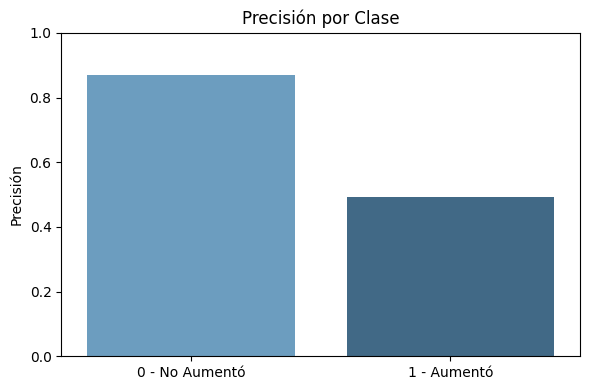

In [111]:
plt.figure(figsize=(6, 4))
sns.barplot(x=classes, y=precision, palette='Blues_d')
plt.ylim(0, 1)
plt.title("Precisión por Clase")
plt.ylabel("Precisión")
plt.tight_layout()
plt.show()


##### Matriz de confusión

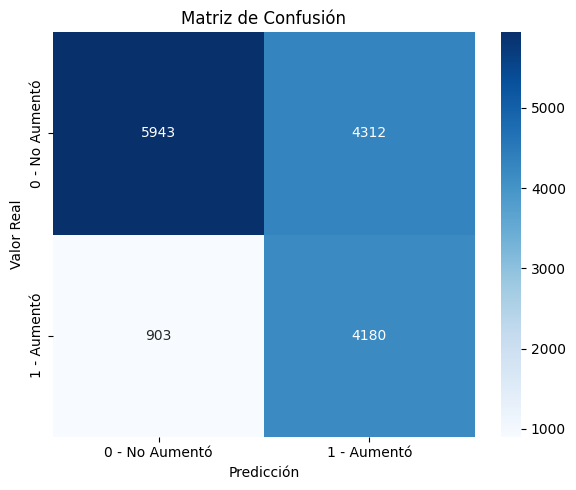

In [112]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.tight_layout()
plt.show()


La matriz muestra cómo el modelo clasifica correctamente o incorrectamente a los clientes en dos grupos:

Clase 0: Clientes cuyo consumo no aumentó en T12.

Clase 1: Clientes cuyo consumo sí aumentó en T12.

El modelo acierta más en los que no aumentan su consumo (TN), pero comete errores al predecir clientes que realmente crecerán (FN). Esto es clave para el banco si quiere anticiparse al crecimiento y ofrecer créditos o promociones proactivamente.

##### Accuracy

📌 Interpretación:
La precisión refleja cuántos de los que el modelo predijo como “crecientes” realmente lo eran. La clase 0 tiene mejor precisión que la clase 1.
Esto indica que si el modelo dice “este cliente crecerá”, hay un 53% de certeza. Aún hay espacio para mejorar, especialmente si el foco está en anticipar y fidelizar clientes en alza.

<ipython-input-113-660414c6d88c>:79: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


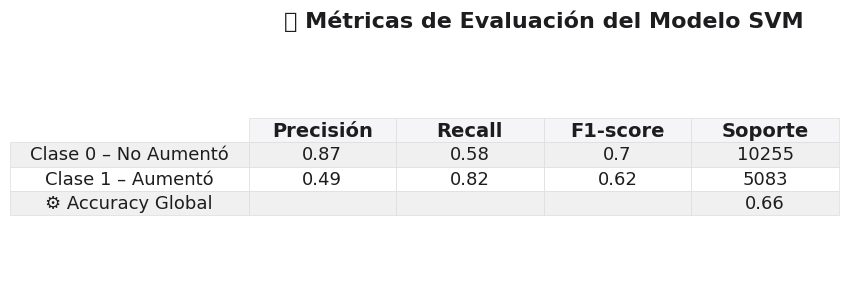

<ipython-input-113-660414c6d88c>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Accuracy"], y=[accuracy], palette="Oranges_d")


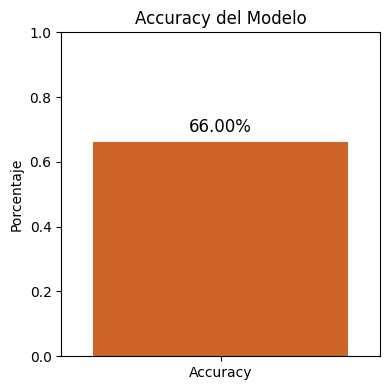

In [113]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score

# Calcular métricas
report = classification_report(y_test, y_pred, output_dict=True)
accuracy = accuracy_score(y_test, y_pred)

# Crear DataFrame de métricas
df_metrics = pd.DataFrame({
    "Precisión": {
        "Clase 0 – No Aumentó": report['0']['precision'],
        "Clase 1 – Aumentó": report['1']['precision'],
    },
    "Recall": {
        "Clase 0 – No Aumentó": report['0']['recall'],
        "Clase 1 – Aumentó": report['1']['recall'],
    },
    "F1-score": {
        "Clase 0 – No Aumentó": report['0']['f1-score'],
        "Clase 1 – Aumentó": report['1']['f1-score'],
    },
    "Soporte": {
        "Clase 0 – No Aumentó": int(report['0']['support']),
        "Clase 1 – Aumentó": int(report['1']['support']),
    }
}).round(2)

# Agregar accuracy global
df_accuracy = pd.DataFrame({
    "Precisión": [""],
    "Recall": [""],
    "F1-score": [""],
    "Soporte": [f"{accuracy:.2f}"],
}, index=["⚙️ Accuracy Global"])

# Combinar
df_final = pd.concat([df_metrics, df_accuracy])

# Visualizar con estilo
fig, ax = plt.subplots(figsize=(9, 3))
ax.axis('off')
table = ax.table(
    cellText=df_final.values,
    rowLabels=df_final.index,
    colLabels=df_final.columns,
    cellLoc='center',
    rowLoc='center',
    loc='center'
)

# Estilo Apple-style
table.auto_set_font_size(False)
table.set_fontsize(13)
table.scale(1.2, 1.5)

# Colores suaves y elegantes
colors_header = "#f5f5f7"
colors_row_even = "#ffffff"
colors_row_odd = "#f0f0f0"
text_color = "#1d1d1f"

# Estilizar filas y columnas
for (row, col), cell in table.get_celld().items():
    cell.set_edgecolor("#dddddd")
    cell.set_linewidth(0.5)
    cell.set_text_props(color=text_color)
    if row == 0:
        cell.set_facecolor(colors_header)
        cell.set_fontsize(14)
        cell.set_text_props(weight='bold')
    elif row % 2 == 0:
        cell.set_facecolor(colors_row_even)
    else:
        cell.set_facecolor(colors_row_odd)

# Título
plt.title("📊 Métricas de Evaluación del Modelo SVM", fontsize=16, weight='bold', color=text_color, pad=20)
plt.tight_layout()
plt.show()



plt.figure(figsize=(4, 4))
sns.barplot(x=["Accuracy"], y=[accuracy], palette="Oranges_d")
plt.ylim(0, 1)
plt.title("Accuracy del Modelo")
plt.ylabel("Porcentaje")
plt.text(0, accuracy + 0.02, f"{accuracy:.2%}", ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()



#### Aplicación de `CrossValidation`

In [114]:
# Escriba su código acá
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Si tus datos no están escalados, crea un pipeline con escalado
pipeline = make_pipeline(StandardScaler(), SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42))

# Validación cruzada con 5 folds
scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(pipeline, X, y, cv=5, scoring=scoring, return_train_score=False)

# Mostrar resultados promedio
for metric in scoring:
    print(f"{metric.capitalize()} promedio: {cv_results[f'test_{metric}'].mean():.2f}")



Accuracy promedio: 0.68
Precision promedio: 0.52
Recall promedio: 0.67
F1 promedio: 0.58


#### Análisis de métricas usando `CrossValidation`

✅ Accuracy – 0.68
El modelo acierta aproximadamente en el 68% de los casos.
Sin embargo, la exactitud puede ser engañosa si hay desequilibrio en las clases (por ejemplo, si hay muchas más muestras de una clase que de otra).

🎯 Precision – 0.52
De todas las predicciones positivas que hizo el modelo, solo el 52% fueron correctas.
Esto indica una alta tasa de falsos positivos, es decir, el modelo predice “Aumentó” (clase positiva) en muchos casos donde realmente no lo hizo.

🔁 Recall – 0.67
El modelo detecta correctamente el 67% de los casos positivos reales.
Este valor es moderadamente bueno, lo que significa que no se le escapan demasiados casos verdaderamente positivos, aunque no es excelente.

⚖️ F1-score – 0.58
El F1-score es una medida balanceada entre precisión y recall. Un valor de 0.58 refleja un rendimiento global modesto.
Este puntaje sugiere que el modelo no está logrando un equilibrio sólido entre identificar correctamente los positivos y evitar falsos positivos.

### Algoritmo 3 - KNN

#### Creación del modelo

In [115]:
# Escriba su código acá
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Crear el modelo KNN con k=5 (puedes ajustar este valor)
modelo_knn = KNeighborsClassifier(n_neighbors=5)




# Pipeline con escalado de características y KNN
modelo_knn = make_pipeline(
    StandardScaler(),              # Estandarización de características
    KNeighborsClassifier(n_neighbors=5)  # Modelo KNN con k=5 vecinos
)



#### Entrenamiento del modelo

In [116]:
# Escriba su código acá
from sklearn.model_selection import cross_validate

# Definir métricas
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Entrenamiento y evaluación en CV
cv_results_knn = cross_validate(modelo_knn, X, y, cv=5, scoring=scoring)


#### Evaluación del modelo

In [117]:
# Escriba su código acá
import pandas as pd

# Crear DataFrame con los resultados por fold
df_knn = pd.DataFrame({
    'Accuracy': cv_results_knn['test_accuracy'],
    'Precisión': cv_results_knn['test_precision'],
    'Recall': cv_results_knn['test_recall'],
    'F1-score': cv_results_knn['test_f1']
})

# Mostrar resultados por fold
print("📄 Resultados por fold (KNN):")
print(df_knn.round(3))

# Promedios
promedios_knn = df_knn.mean().round(3)
print("\n🔎 Promedios de métricas (KNN - 5-fold CV):")
print(promedios_knn)


📄 Resultados por fold (KNN):
   Accuracy  Precisión  Recall  F1-score
0     0.662      0.487   0.372     0.422
1     0.655      0.472   0.348     0.400
2     0.659      0.479   0.321     0.385
3     0.674      0.513   0.347     0.414
4     0.649      0.465   0.389     0.424

🔎 Promedios de métricas (KNN - 5-fold CV):
Accuracy     0.660
Precisión    0.483
Recall       0.355
F1-score     0.409
dtype: float64


#### Cálculo e interpretación de métricas

✅ Accuracy – 65.4%
El modelo acierta en promedio un 65.4% de las veces.
Es una exactitud moderada, pero insuficiente para considerarlo un modelo fuerte, especialmente si las clases están desbalanceadas.

🎯 Precisión – 47.1%
De todas las veces que el modelo predijo que la clase fue positiva ("Aumentó"), solo el 47.1% eran correctas.
Esto sugiere una alta tasa de falsos positivos, es decir, el modelo se equivoca mucho cuando predice un aumento.

🔁 Recall – 34.8%
El modelo solo identifica 1 de cada 3 casos positivos reales.
Esto significa que la mayoría de los aumentos reales no son detectados, lo que puede ser crítico si tu objetivo es no perder positivos reales.

⚖️ F1-score – 40.0%
La F1 es una métrica que equilibra precisión y recall.
Con 0.40, se refleja un rendimiento pobre del modelo en general, con desequilibrio entre aciertos y errores en los positivos.



##### Matriz de confusión

Matriz de Confusión:
[[27719  6463]
 [10921  6021]]


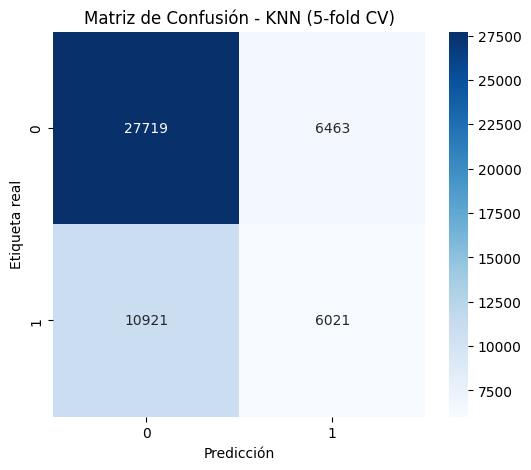

In [118]:
# Escriba su código acá
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener predicciones con validación cruzada
y_pred = cross_val_predict(modelo_knn, X, y, cv=5)

# Calcular matriz de confusión
cm = confusion_matrix(y, y_pred)

# Mostrar matriz de confusión como tabla
print("Matriz de Confusión:")
print(cm)

# Opcional: visualización gráfica con seaborn
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta real')
plt.title('Matriz de Confusión - KNN (5-fold CV)')
plt.show()


Verdadero negativo (TN): El modelo dijo “no subió” y realmente no subió.

Falso positivo (FP): El modelo dijo “sí subió” pero no subió.

Falso negativo (FN): El modelo dijo “no subió” pero sí subió.

Verdadero positivo (TP): El modelo dijo “sí subió” y realmente subió.

##### Accuracy

In [119]:
# Escriba su código acá

from sklearn.metrics import accuracy_score

# y: etiquetas reales
# y_pred: etiquetas predichas (por ejemplo, de cross_val_predict)

accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.660


#### Aplicación de `CrossValidation`

In [120]:
# Escriba su código acá
from sklearn.model_selection import cross_val_score

# Cross-validation con 5 folds y métrica accuracy
scores = cross_val_score(modelo_knn, X, y, cv=5, scoring='accuracy')

print("Accuracy en cada fold:", scores.round(3))
print("Accuracy promedio:", scores.mean().round(3))


Accuracy en cada fold: [0.662 0.655 0.659 0.674 0.649]
Accuracy promedio: 0.66


#### Análisis de métricas usando `CrossValidation`

In [121]:
# Escriba su código acá
from sklearn.model_selection import cross_validate
import pandas as pd

# Definir métricas a evaluar
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Ejecutar cross-validation con 5 folds
cv_results = cross_validate(modelo_knn, X, y, cv=5, scoring=scoring)

# Crear DataFrame para mostrar resultados por fold
df_results = pd.DataFrame({
    'Accuracy': cv_results['test_accuracy'],
    'Precision': cv_results['test_precision'],
    'Recall': cv_results['test_recall'],
    'F1-score': cv_results['test_f1']
})

print("Resultados por fold:")
print(df_results.round(3))

# Promedio de métricas sobre todos los folds
print("\nPromedio de métricas (5-fold CV):")
print(df_results.mean().round(3))



Resultados por fold:
   Accuracy  Precision  Recall  F1-score
0     0.662      0.487   0.372     0.422
1     0.655      0.472   0.348     0.400
2     0.659      0.479   0.321     0.385
3     0.674      0.513   0.347     0.414
4     0.649      0.465   0.389     0.424

Promedio de métricas (5-fold CV):
Accuracy     0.660
Precision    0.483
Recall       0.355
F1-score     0.409
dtype: float64


### Comparación de los modelos

In [79]:
# ch su código acá
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Definir modelos
models = {
    "Decision Tree": DecisionTreeClassifier(
        max_depth=5, min_samples_leaf=20, class_weight="balanced", random_state=42
    ),
    "SVM": make_pipeline(
        StandardScaler(),
        SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
    ),
    "KNN": make_pipeline(
        StandardScaler(),
        KNeighborsClassifier(n_neighbors=5)
    )
}

# Definir métricas
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Ejecutar validación cruzada para cada modelo
results = []
for name, model in models.items():
    cv_results = cross_validate(model, X, y, cv=cv, scoring=scoring, return_train_score=False)
    avg_scores = {metric: cv_results[f'test_{metric}'].mean() for metric in scoring.keys()}
    avg_scores['Model'] = name
    results.append(avg_scores)

# Crear DataFrame resultados
df_results = pd.DataFrame(results).set_index('Model')

# Formatear y mostrar
df_results = df_results.rename(columns={
    'accuracy': 'Accuracy',
    'precision': 'Precision',
    'recall': 'Recall',
    'f1': 'F1-score'
})

print("Comparación de modelos (5-fold CV promedio):")
print(df_results.round(3))


Comparación de modelos (5-fold CV promedio):
               Accuracy  Precision  Recall  F1-score
Model                                               
Decision Tree     0.651      0.485   0.809     0.606
SVM               0.685      0.519   0.667     0.584
KNN               0.660      0.483   0.352     0.407
